In [1]:
import sys

sys.path[0] = '/bbkinghome/mbarrera/git_supply/nndp/src'

import sys
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import nndp

In [2]:
from model import u, m, F, policy, T

In [6]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
params, nn = nndp.initialize_deep_nn(subkey,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer = 128,
                                hidden_layers = 5,
                                hidden_activation = jax.nn.tanh,
                                output_activation = [jax.nn.relu])

In [7]:
key, subkey = jax.random.split(key)

params,result = nndp.core.train(key = subkey,
               params = params,
               nn = nn,
               policy = policy,
               u = u,
               m = m,
               F = F,
               T = T,
               N_simul = 100,
               batch_size = 100,
               epochs = 25,
               optimizer = optax.adam(1e-3)
               )

Objective value on training iteration 24 out of 25: 36.181652069091894

<Axes: title={'center': 'Convergence of Objective Function'}, xlabel='Epoch', ylabel='Objective Function'>

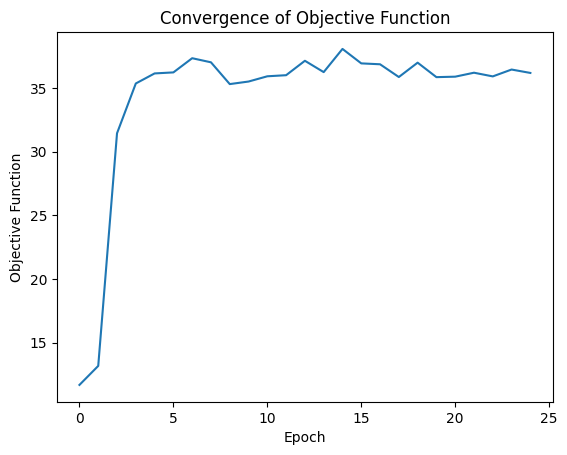

In [8]:
result.plot_convergence()

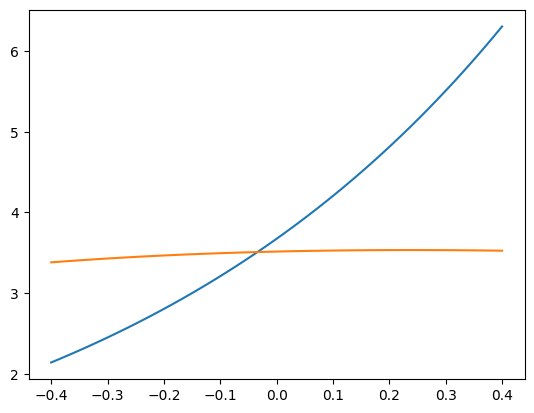

In [9]:
from model import delta, r, alpha, rho_z, sigma_z
z = jnp.linspace(-0.4,0.4)
state = jnp.column_stack([jnp.zeros_like(z), z, jnp.ones_like(z)])
fig, ax = plt.subplots()
ax.plot(z, ((delta+r)/(alpha*jnp.exp(rho_z*z+1/2*sigma_z**2)))**(1/(alpha-1)))
ax.plot(z, policy(state, params, nn))
fig.show()